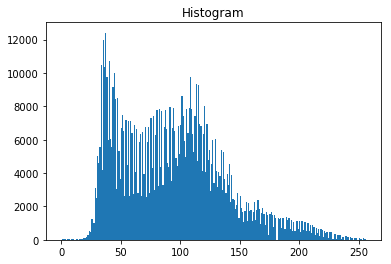

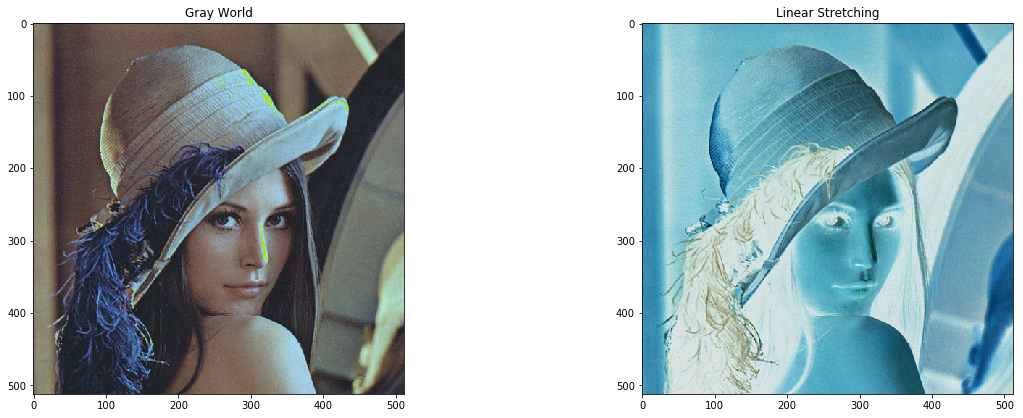

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage
import numpy as np
import cv2
import os
from skimage import io

def func(img_color, x):
    return np.sum(img_color)/x

image = io.imread(os.path.join("lena_cover.jpg"))
copy = image

# Implementation of the linear stretching of brightness
miN = np.amin(image)
maX = np.amax(image)
lin_out = (255*(image-miN))/(maX-miN)

# Implementation of the "gray world"
r, g, b = copy[:,:,0], copy[:,:,1], copy[:,:,2]
n = copy.shape[0] #*copy.shape[1]
avg_red = func(r, n)
#print(avg_red)
avg_green = func(g, n)
avg_blue = func(b, n)
avg = (avg_red + avg_green + avg_blue)/3
copy[:,:,0] = r * avg/avg_red
copy[:,:,1] = g * avg/avg_green
copy[:,:,2] = b * avg/avg_blue

plt.hist(image.flatten(),256,[0,256])
plt.title('Histogram')
fig = plt.figure(figsize = (20, 15))
plt.subplot(221), plt.imshow(copy)
plt.title('Gray World')
plt.subplot(222), plt.imshow(lin_out, cmap = 'gray')
plt.title('Linear Stretching')
plt.show()
